In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image
knn=KNeighborsClassifier()

Si tienes algún error al ejecutar la celda anterior verifica que tu ambiente de anaconda tenga las librerías necesarias.

Instalación de PIL en anaconda: https://anaconda.org/anaconda/pillow

Ejecuta el siguiente comando para instalar PIL en tu ambiente `conda install -c anaconda pillow`

# Clasificación con K-nearest neighbor
En este notebook vamos a implementar K-nearest neighbor con sklearn, nuestro algoritmo va a **clasificar** a que raza pertenece la imagen de un perro, para entrenar nuestro algoritmo vamos a utilizar un set de datos contiene imagenes de 120 razas de perros, en total son 10,222 imagenes.

Data: [Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/data)

#### Pre-procesamiento
La data ya fue procesada y se extrajeron las features de las imagenes con google Inception, esto se conoce como transfer learning, luego estas features fueron almacenadas con numpy. 

Transfer learning es utilizar el conocimiento adquirido en tareas en las que existen muchos datos y luego aplicar este conocimiento en nuevas tareas donde tenemos menos datos.


En esta parte del notebook solo hay que ejecutar las celdas para cargar los datos, estos datos van a servir de entrada para nuestra implementación de K-nearest neighbor con sklearn.


##### Inception
https://www.tensorflow.org/tutorials/image_recognition

https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html

##### Transfer Learning
https://www.datacamp.com/community/tutorials/transfer-learning

In [9]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

In [10]:
TRAIN_DICTIONARY_KEYS = ["names", "label","features"]

training_set_dict = dict()
    
training_set_dict['names'] = np.load(training_image_names_array)
training_set_dict['label'] = np.load(training_image_labels_array)
training_set_dict['features'] = np.load(images_inception_features)


## sklearn K-Neighbors


Consulta la documentacion de sklearn, o puedes guiarte con lo visto en clase.

[Documentacion oficial](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [11]:
features = training_set_dict['features']
labels = training_set_dict['label']

## Implementa tu codigo aqui ##
neigh = knn.fit(features, labels)


## Probamos el algoritmo con nuevas imagenes

Como buena practica luego de entrenar nuestro algoritmo, lo probamos con imagenes que no ha visto antes 

In [12]:
test_features = np.load('./data/test/test_inception_features_array.npy')

### Prueba 1

In [13]:
predict_image = test_features[0]
neigh.predict(predict_image.reshape(1, -1))

array(['german_shepherd'], dtype=object)

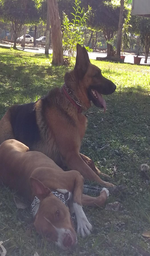

In [14]:
img_test = Image.open('./data/test/test1.jpg')
img_test = img_test.resize((150, 256), Image.ANTIALIAS)
img_test

### Prueba 2

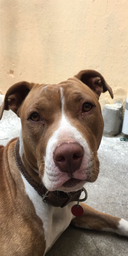

In [15]:
img_test = Image.open('./data/test/test2.jpg')
img_test = img_test.resize((128, 256), Image.ANTIALIAS)
img_test

In [20]:
predict_image = test_features[1].reshape(1, -1)


## Implementa tu codigo para predecir aqui ##
# Deberiamos obtener: american_staffordshire_terrier #

neigh.predict(predict_image)

array(['american_staffordshire_terrier'], dtype=object)